# Estudio del impacto de la tasa de variación del PIB en la tasa de paro
## Exploratory Data Analysis (EDA)
### por Jose Antonio Moreno De Castro
### Mayo 2022

## Importación de librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
import matplotlib as mpl

## Importación de datos

In [97]:
Var_PIB2=pd.read_excel('C:\\Users\\jmore\\THE_BRIDGE_FEB22\\EDA\\src\\data\\VAR_PIB.xlsx')

In [98]:
Var_PIB2=Var_PIB2.drop_duplicates()
len(Var_PIB2)

80

In [2]:
# Importamos los dos dataset que vamos a utilizar:
Tasas_paro=pd.read_excel('C:\\Users\\jmore\\THE_BRIDGE_FEB22\\EDA\src\\data\\Tasas_paro.xlsx')
Var_PIB=pd.read_excel('C:\\Users\\jmore\\THE_BRIDGE_FEB22\\EDA\\src\\data\\VAR_PIB.xlsx')

In [3]:
Tasas_paro.head(20)

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres
0,2021T4,Total_Nacional,13.33,30.70,12.15,11.79,15.04
1,2021T4,Andalucía,20.18,39.15,18.87,17.21,23.67
2,2021T4,Aragón,9.02,19.61,8.28,8.17,9.96
3,2021T4,Asturias,10.01,10.43,10.00,9.67,10.39
4,2021T4,Islas_Baleares,14.90,32.04,13.95,14.19,15.68
5,2021T4,Canarias,18.94,52.16,17.02,17.77,20.21
6,2021T4,Cantabria,11.52,26.60,10.84,10.40,12.82
7,2021T4,Castilla_y_León,10.33,27.27,9.38,8.86,12.04
8,2021T4,Castilla_La_Mancha,13.31,27.47,12.37,9.43,18.21
9,2021T4,Cataluña,10.16,27.27,8.72,8.86,11.53


In [4]:
Var_PIB

,Periodo,Var_PIB
0,2021T4,4.7583
1,2021T4,4.7583
2,2021T4,4.7583
3,2021T4,4.7583
4,2021T4,4.7583
...,...,...
1595,2002T1,1.5069
1596,2002T1,1.5069
1597,2002T1,1.5069
1598,2002T1,1.5069


## Detalle del dataset:

### Tasas_paro:

Este dataset contiene los datos de las tasas de paro en España de los ultimos 20 años (desde el año 2002 hasta el año 2021) divididas en trimestres, en el dataset podemos encontrar las tasas de paro trimestrales de cada una de las comunidades autónomas además de la tasa de paro a nivel nacional. 

Los datos están separados en 7 columnas, 5 de ellas son categorias referidas a un grupo poblacional concreto:

1. Periodo: Esto se refiere al año y trimestre de este, por ejemplo 2017T2 se refiere al segundo trimestre (T2) del 2017.
2. Comunidad: Esta columna contiene los datos referidos a cada una de las comunidades autónomas o al total nacional.
3. Total: Tasa de paro total de cada región indicada refiriendose al total de la población.
4. Menores_25: Se refiere a la tasa de paro juvenil, que es la tasa de paro del conjunto de la población menor de 25 años.
5. Mayores_25: Se refiere a la tasa de paro del conjunto de la población con una edad igual o mayor a 25 años.
6. Parados_hombres: Tasa de paro del conjunto de la población masculina.
7. Parados_mujeres: Tasa de paro del conjunto de la población femenina.

### Var_PIB:

Este dataset contiene los datos de la tasa de variación del PIB de los últimos 20 años en España dividido en trimestres al igual que el primer dataset de las tasas de paro, la diferencia es que en esta ocasión los datos son a nivel nacional por lo que tomaremos el dato nacional para cada una de las diferentes comunidades autónomas.

Los datos están separados en tan solo 2 columnas:

1. Periodo: Esto se refiere al año y trimestre de este, por ejemplo 2017T2 se refiere al segundo trimestre (T2) del 2017. Esta columna es exactamente idéntica a la del anterior dataset ya que se refiere a los datos comprendidos entre el primer trimestre de 2002 y el cuarto trimestre de 2021 por lo que al unirlos solo aparecerá una vez.

2. Var_PIB: En esta columna tenemos las tasas de las variaciones trimestrales del PIB para cada trimestre de cada año desde el 2002 hasta el 2021.

### Fuentes:

Todos estos datos han sido sacados de la pagina wec el INE (Instituto Nacional de Estadística) `https://ine.es/index.htm` un organismo autónomo encargado de la coordinación general de los servicios estadísticos de la Administración General del Estado y la vigilancia, control y supervisión de los procedimientos técnicos de los mismos.
Entre los trabajos que realiza, destacan las estadísticas sobre la demografía, economía, y sociedad españolas. A través de la página web oficial se pueden seguir todas las actualizaciones de los distintos trabajos y estudios.




## 1. Preparación del dataset

En este caso los datos están bastante limpios, por lo que únicamente necesitaríamos juntar las dos bases de datos

In [100]:
Tabla_prueba=pd.merge(Tasas_paro,Var_PIB2,on='Periodo')
Tabla_prueba

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB
0,2021T4,Total_Nacional,13.33,30.70,12.15,11.79,15.04,4.7583
1,2021T4,Andalucía,20.18,39.15,18.87,17.21,23.67,4.7583
2,2021T4,Aragón,9.02,19.61,8.28,8.17,9.96,4.7583
3,2021T4,Asturias,10.01,10.43,10.00,9.67,10.39,4.7583
4,2021T4,Islas_Baleares,14.90,32.04,13.95,14.19,15.68,4.7583
...,...,...,...,...,...,...,...,...
1595,2002T1,Navarra,6.03,13.51,5.03,3.67,9.68,1.5069
1596,2002T1,País_Vasco,9.56,18.10,8.64,6.20,14.39,1.5069
1597,2002T1,La_Rioja,7.05,15.05,6.04,5.75,9.41,1.5069
1598,2002T1,Ceuta,7.01,23.28,4.80,4.57,12.12,1.5069


In [5]:
# Primero eliminamos la columna "Periodo" ya que aparece en ambos dataset y es exactamente igual:
VarPIB=Var_PIB.drop(['Periodo'], axis=1)

In [6]:
VarPIB

,Var_PIB
0,4.7583
1,4.7583
2,4.7583
3,4.7583
4,4.7583
...,...
1595,1.5069
1596,1.5069
1597,1.5069
1598,1.5069


In [7]:
Var_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Periodo  1600 non-null   object 
 1   Var_PIB  1600 non-null   float64
dtypes: float64(1), object(1)
memory usage: 25.1+ KB


In [8]:
# Juntamos ambas bases de datos para crear nuestro dataset completo.
Union_paro_pib=Tasas_paro.join(VarPIB)
Union_paro_pib

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB
0,2021T4,Total_Nacional,13.33,30.70,12.15,11.79,15.04,4.7583
1,2021T4,Andalucía,20.18,39.15,18.87,17.21,23.67,4.7583
2,2021T4,Aragón,9.02,19.61,8.28,8.17,9.96,4.7583
3,2021T4,Asturias,10.01,10.43,10.00,9.67,10.39,4.7583
4,2021T4,Islas_Baleares,14.90,32.04,13.95,14.19,15.68,4.7583
...,...,...,...,...,...,...,...,...
1595,2002T1,Navarra,6.03,13.51,5.03,3.67,9.68,1.5069
1596,2002T1,País_Vasco,9.56,18.10,8.64,6.20,14.39,1.5069
1597,2002T1,La_Rioja,7.05,15.05,6.04,5.75,9.41,1.5069
1598,2002T1,Ceuta,7.01,23.28,4.80,4.57,12.12,1.5069


In [9]:
# Se paramos el trimestre del año:
Lista_años=Union_paro_pib['Periodo'].str.split('T',expand=True)
Lista_años[0]

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
1595    2002
1596    2002
1597    2002
1598    2002
1599    2002
Name: 0, Length: 1600, dtype: object

In [10]:
# Añadimos la columna años
Union_paro_pib['Año']=Lista_años[0]
Union_paro_pib

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año
0,2021T4,Total_Nacional,13.33,30.70,12.15,11.79,15.04,4.7583,2021
1,2021T4,Andalucía,20.18,39.15,18.87,17.21,23.67,4.7583,2021
2,2021T4,Aragón,9.02,19.61,8.28,8.17,9.96,4.7583,2021
3,2021T4,Asturias,10.01,10.43,10.00,9.67,10.39,4.7583,2021
4,2021T4,Islas_Baleares,14.90,32.04,13.95,14.19,15.68,4.7583,2021
...,...,...,...,...,...,...,...,...,...
1595,2002T1,Navarra,6.03,13.51,5.03,3.67,9.68,1.5069,2002
1596,2002T1,País_Vasco,9.56,18.10,8.64,6.20,14.39,1.5069,2002
1597,2002T1,La_Rioja,7.05,15.05,6.04,5.75,9.41,1.5069,2002
1598,2002T1,Ceuta,7.01,23.28,4.80,4.57,12.12,1.5069,2002


In [11]:
# Añadimos la columna con los trimestres
Union_paro_pib['Trimestre']=Lista_años[1]
Union_paro_pib

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
0,2021T4,Total_Nacional,13.33,30.70,12.15,11.79,15.04,4.7583,2021,4
1,2021T4,Andalucía,20.18,39.15,18.87,17.21,23.67,4.7583,2021,4
2,2021T4,Aragón,9.02,19.61,8.28,8.17,9.96,4.7583,2021,4
3,2021T4,Asturias,10.01,10.43,10.00,9.67,10.39,4.7583,2021,4
4,2021T4,Islas_Baleares,14.90,32.04,13.95,14.19,15.68,4.7583,2021,4
...,...,...,...,...,...,...,...,...,...,...
1595,2002T1,Navarra,6.03,13.51,5.03,3.67,9.68,1.5069,2002,1
1596,2002T1,País_Vasco,9.56,18.10,8.64,6.20,14.39,1.5069,2002,1
1597,2002T1,La_Rioja,7.05,15.05,6.04,5.75,9.41,1.5069,2002,1
1598,2002T1,Ceuta,7.01,23.28,4.80,4.57,12.12,1.5069,2002,1


In [12]:
# Guardo como CSV y excel los cambios realizados:
Union_paro_pib.to_csv('C:\\Users\\jmore\\THE_BRIDGE_FEB22\\EDA\\src\\data\\Paro_PIB')

## 2. Exploración y descripción de los datos

In [13]:
# Importamos el nuevo fichero CSV que hemos creado:
Paro_PIB= pd.read_csv('C:\\Users\\jmore\\THE_BRIDGE_FEB22\\EDA\\src\\data\\Paro_PIB')

In [14]:
# Tamaño
Paro_PIB.shape

(1600, 11)

In [15]:
# Primeros y ultimos datos del dataset
Paro_PIB

,Unnamed: 0,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
0,0,2021T4,Total_Nacional,13.33,30.70,12.15,11.79,15.04,4.7583,2021,4
1,1,2021T4,Andalucía,20.18,39.15,18.87,17.21,23.67,4.7583,2021,4
2,2,2021T4,Aragón,9.02,19.61,8.28,8.17,9.96,4.7583,2021,4
3,3,2021T4,Asturias,10.01,10.43,10.00,9.67,10.39,4.7583,2021,4
4,4,2021T4,Islas_Baleares,14.90,32.04,13.95,14.19,15.68,4.7583,2021,4
...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,2002T1,Navarra,6.03,13.51,5.03,3.67,9.68,1.5069,2002,1
1596,1596,2002T1,País_Vasco,9.56,18.10,8.64,6.20,14.39,1.5069,2002,1
1597,1597,2002T1,La_Rioja,7.05,15.05,6.04,5.75,9.41,1.5069,2002,1
1598,1598,2002T1,Ceuta,7.01,23.28,4.80,4.57,12.12,1.5069,2002,1


In [16]:
# Información sobre las columnas
Paro_PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1600 non-null   int64  
 1   Periodo          1600 non-null   object 
 2   Comunidad        1600 non-null   object 
 3   Total            1600 non-null   float64
 4   Menores_25       1600 non-null   float64
 5   Mayores_25       1600 non-null   float64
 6   Parados_hombres  1600 non-null   float64
 7   Parados_mujeres  1600 non-null   float64
 8   Var_PIB          1600 non-null   float64
 9   Año              1600 non-null   int64  
 10  Trimestre        1600 non-null   int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 137.6+ KB


## 3. Analisis de los datos

In [17]:
# Ordenamos los datos de menor a mayor para que respeten mas el orden cronológico:
Paro_PIB=Paro_PIB.sort_values(['Año','Trimestre'])
Paro_PIB

,Unnamed: 0,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1580,1580,2002T1,Total_Nacional,11.55,22.08,9.96,8.36,16.35,1.5069,2002,1
1581,1581,2002T1,Andalucía,18.95,30.13,16.92,14.29,26.47,1.5069,2002,1
1582,1582,2002T1,Aragón,5.42,15.22,4.24,3.57,8.48,1.5069,2002,1
1583,1583,2002T1,Asturias,9.15,21.51,7.84,6.60,13.16,1.5069,2002,1
1584,1584,2002T1,Islas_Baleares,8.96,14.18,8.14,7.04,11.84,1.5069,2002,1
...,...,...,...,...,...,...,...,...,...,...,...
15,15,2021T4,Navarra,9.93,18.23,9.32,11.31,8.39,4.7583,2021,4
16,16,2021T4,País_Vasco,8.43,27.15,7.19,8.94,7.90,4.7583,2021,4
17,17,2021T4,La_Rioja,10.45,27.19,9.45,9.73,11.24,4.7583,2021,4
18,18,2021T4,Ceuta,26.86,40.50,25.64,20.78,34.52,4.7583,2021,4


In [18]:
# Descripción en bruto del dataset, por columnas:
Paro_PIB.describe(include='float64')

,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,15.977881,35.425950,14.247613,14.149987,18.523812,0.767375
std,7.302489,14.992221,6.779644,7.266480,8.017662,3.069035
min,0.410000,0.000000,0.460000,0.000000,1.210000,-17.120300
25%,10.260000,22.755000,8.947500,8.257500,12.585000,-0.093950
50%,14.635000,34.220000,13.200000,12.870000,16.670000,0.867850
75%,20.860000,46.412500,18.682500,19.172500,23.640000,1.601800
max,39.190000,90.350000,37.210000,39.890000,55.280000,17.618000


In [19]:
# Para el analisis general vamos a usar solamente los datos del Total Nacional:
PIB_total = Paro_PIB['Comunidad']=='Total_Nacional'
Total_Nacional=Paro_PIB[PIB_total]
Total_Nacional

,Unnamed: 0,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1580,1580,2002T1,Total_Nacional,11.55,22.08,9.96,8.36,16.35,1.5069,2002,1
1560,1560,2002T2,Total_Nacional,11.15,21.50,9.60,7.86,16.04,1.8697,2002,2
1540,1540,2002T3,Total_Nacional,11.49,22.05,9.87,8.33,16.20,1.4831,2002,3
1520,1520,2002T4,Total_Nacional,11.61,23.16,9.92,8.65,16.00,1.4646,2002,4
1500,1500,2003T1,Total_Nacional,11.99,23.39,10.37,8.76,16.73,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...,...
80,80,2020T4,Total_Nacional,16.13,40.13,14.55,14.17,18.33,0.3911,2020,4
60,60,2021T1,Total_Nacional,15.98,39.53,14.45,14.07,18.13,-0.7795,2021,1
40,40,2021T2,Total_Nacional,15.26,38.38,13.60,13.39,17.36,1.5554,2021,2
20,20,2021T3,Total_Nacional,14.57,31.15,13.29,12.97,16.36,4.2696,2021,3


In [20]:
Total=np.array(Total_Nacional['Total'].values)
Menores_25=np.array(Total_Nacional['Menores_25'].values)
Mayores_25=np.array(Total_Nacional['Mayores_25'].values)
Parados_hombres=np.array(Total_Nacional['Parados_hombres'].values)
Parados_mujeres=np.array(Total_Nacional['Parados_mujeres'].values)
Var_PIB=np.array(Total_Nacional['Var_PIB'].values)
Año=np.array(Total_Nacional['Año'].values)
Periodo=np.array(Total_Nacional['Periodo'].values)

In [21]:
print(Total)
print(Menores_25)
print(Mayores_25)
print(Parados_hombres)
print(Parados_mujeres)
print(Var_PIB)

[11.55 11.15 11.49 11.61 11.99 11.28 11.3  11.37 11.5  11.09 10.74 10.53
 10.17  9.32  8.41  8.71  9.03  8.44  8.08  8.26  8.42  7.93  8.01  8.57
  9.6  10.36 11.23 13.79 17.24 17.77 17.75 18.66 19.84 19.89 19.59 20.11
 21.08 20.64 21.28 22.56 24.19 24.4  24.79 25.77 26.94 26.06 25.65 25.73
 25.93 24.47 23.67 23.7  23.78 22.37 21.18 20.9  21.   20.   18.91 18.63
 18.75 17.22 16.38 16.55 16.74 15.28 14.55 14.45 14.7  14.02 13.92 13.78
 14.41 15.33 16.26 16.13 15.98 15.26 14.57 13.33]
[22.08 21.5  22.05 23.16 23.39 22.28 22.19 22.94 22.65 22.46 21.63 21.27
 21.69 20.29 18.01 18.62 18.71 18.2  16.9  17.81 17.72 18.12 17.87 18.66
 21.08 23.62 24.18 28.97 35.54 38.06 38.57 38.81 40.73 41.97 40.56 42.73
 45.3  45.87 45.58 48.14 51.67 53.04 52.01 54.83 56.92 55.98 54.14 54.89
 55.49 53.12 52.39 51.8  51.36 49.22 46.58 46.24 46.5  46.48 41.94 42.92
 41.66 39.53 35.97 37.46 36.34 34.68 33.   33.54 34.97 33.14 31.68 30.51
 32.99 39.61 40.45 40.13 39.53 38.38 31.15 30.7 ]
[ 9.96  9.6   9.87  9.92

In [22]:
Total_media=Total.mean()
Menores_25_media=Menores_25.mean()
Mayores_25_media=Mayores_25.mean()
Parados_hombres_media=Parados_hombres.mean()
Parados_mujeres_media=Parados_mujeres.mean()
Var_PIB_media=Var_PIB.mean()

In [23]:
Total_varianza=Total.var()
Menores_25_varianza=Menores_25.var()
Mayores_25_varianza=Mayores_25.var()
Parados_hombres_varianza=Parados_hombres.var()
Parados_mujeres_varianza=Parados_mujeres.var()
Var_PIB_varianza=Var_PIB.var()

In [24]:
# La covarianza entre el paro total y la variación del PIB es negativa, lo que quiere decir que estan relacionadas de manera inversa, cuando una sube la otra baja.
cov_paro_pib=np.cov(Var_PIB,Total)[0][1]
cov_paro_pib

-3.2170985632911373

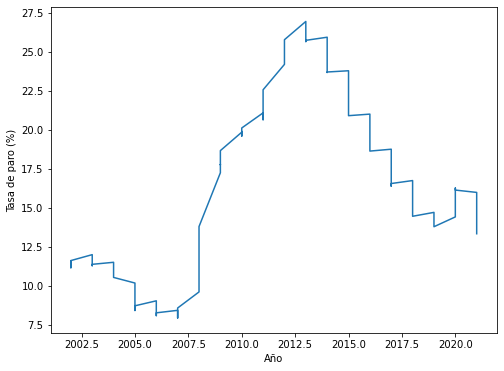

In [25]:
plt.figure(figsize=(8,6))
plt.plot(Año,Total)
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');

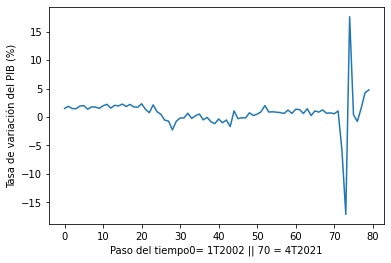

In [26]:
plt.plot(Var_PIB) 
plt.ylabel('Tasa de variación del PIB (%)')
plt.xlabel('Paso del tiempo'
            '0= 1T2002 || 70 = 4T2021');

Aquí podemos observar que los datos del principio del gráfico, que son los referidos a los años 2020 y 2021 son bastante atipicos, probablemente debido al covid, por lo que vamos a quitar los datos de los años del covid, el año 2020 y 2021

In [27]:
Paro_PIB['Periodo'][0:161] # Las filas 0 a 159 son las que tenems que borrar ya que son las referidas a 2020 y 2021.

1580    2002T1
1581    2002T1
1582    2002T1
1583    2002T1
1584    2002T1
         ...  
1456    2003T4
1457    2003T4
1458    2003T4
1459    2003T4
1420    2004T1
Name: Periodo, Length: 161, dtype: object

In [28]:
# Preparamos un array con las filas que vamos a eliminar.
x=np.array(range(0,160)) 
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159])

In [29]:
Paro_PIB_ajustado=Paro_PIB.drop([0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159],axis=0)

In [30]:
#Ahora ya tenemos los datos desde 2019 hasta 2002 que son los que nos interesa analizar.
Paro_PIB_ajustado['Periodo']

1580    2002T1
1581    2002T1
1582    2002T1
1583    2002T1
1584    2002T1
         ...  
175     2019T4
176     2019T4
177     2019T4
178     2019T4
179     2019T4
Name: Periodo, Length: 1440, dtype: object

In [102]:
Paro_PIB_ajustado = Paro_PIB_ajustado.reset_index(drop=True)
Paro_PIB_ajustado

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
0,2002T1,Total_Nacional,11.55,22.08,9.96,8.36,16.35,1.5069,2002,1
1,2002T1,Andalucía,18.95,30.13,16.92,14.29,26.47,1.5069,2002,1
2,2002T1,Aragón,5.42,15.22,4.24,3.57,8.48,1.5069,2002,1
3,2002T1,Asturias,9.15,21.51,7.84,6.60,13.16,1.5069,2002,1
4,2002T1,Islas_Baleares,8.96,14.18,8.14,7.04,11.84,1.5069,2002,1
...,...,...,...,...,...,...,...,...,...,...
1435,2019T4,Navarra,9.01,17.76,8.53,8.12,10.02,1.0641,2019,4
1436,2019T4,País_Vasco,9.09,25.54,8.19,8.59,9.62,1.0641,2019,4
1437,2019T4,La_Rioja,9.89,20.24,9.26,10.39,9.33,1.0641,2019,4
1438,2019T4,Ceuta,27.58,53.26,25.17,25.26,30.96,1.0641,2019,4


In [32]:
# Quitamos la columna Unnamed:0 ya que no nos sirve:
Paro_PIB_ajustado=Paro_PIB_ajustado.drop('Unnamed: 0', axis=1)
Paro_PIB_ajustado


,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1580,2002T1,Total_Nacional,11.55,22.08,9.96,8.36,16.35,1.5069,2002,1
1581,2002T1,Andalucía,18.95,30.13,16.92,14.29,26.47,1.5069,2002,1
1582,2002T1,Aragón,5.42,15.22,4.24,3.57,8.48,1.5069,2002,1
1583,2002T1,Asturias,9.15,21.51,7.84,6.60,13.16,1.5069,2002,1
1584,2002T1,Islas_Baleares,8.96,14.18,8.14,7.04,11.84,1.5069,2002,1
...,...,...,...,...,...,...,...,...,...,...
175,2019T4,Navarra,9.01,17.76,8.53,8.12,10.02,1.0641,2019,4
176,2019T4,País_Vasco,9.09,25.54,8.19,8.59,9.62,1.0641,2019,4
177,2019T4,La_Rioja,9.89,20.24,9.26,10.39,9.33,1.0641,2019,4
178,2019T4,Ceuta,27.58,53.26,25.17,25.26,30.96,1.0641,2019,4


In [33]:
# Guardamos nuestro dataset definitivo como CSV para no perderlo.
Paro_PIB_ajustado.to_csv('C:\\Users\\jmore\\THE_BRIDGE_FEB22\\EDA\\src\\data\\Paro_PIB_ajustado')

## 3.1 Analisis de los diferentes grupos

In [34]:
# Tamaño
Paro_PIB_ajustado.shape

(1440, 10)

In [35]:
# Información sobre las columnas
Paro_PIB_ajustado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 1580 to 179
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Periodo          1440 non-null   object 
 1   Comunidad        1440 non-null   object 
 2   Total            1440 non-null   float64
 3   Menores_25       1440 non-null   float64
 4   Mayores_25       1440 non-null   float64
 5   Parados_hombres  1440 non-null   float64
 6   Parados_mujeres  1440 non-null   float64
 7   Var_PIB          1440 non-null   float64
 8   Año              1440 non-null   int64  
 9   Trimestre        1440 non-null   int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 123.8+ KB


In [36]:
# Descripción en bruto del dataset, por columnas:
Paro_PIB_ajustado.describe(include='float64')

,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB
count,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000
mean,16.050646,35.158062,14.299319,14.219944,18.641660,0.785196
std,7.518449,15.271719,6.993594,7.524689,8.192455,1.015171
min,0.410000,0.000000,0.460000,0.000000,1.210000,-2.267600
25%,10.050000,22.212500,8.637500,7.907500,12.537500,0.150125
50%,14.795000,33.675000,13.230000,12.980000,16.810000,0.867850
75%,21.005000,46.625000,18.975000,19.560000,23.715000,1.529675
max,39.190000,90.350000,37.210000,39.890000,55.280000,2.330400


In [37]:
# Para el analisis general vamos a usar solamente los datos del Total Nacional:
PIB_total = Paro_PIB_ajustado['Comunidad']=='Total_Nacional'
Total_Nacional=Paro_PIB_ajustado[PIB_total]
Total_Nacional

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1580,2002T1,Total_Nacional,11.55,22.08,9.96,8.36,16.35,1.5069,2002,1
1560,2002T2,Total_Nacional,11.15,21.50,9.60,7.86,16.04,1.8697,2002,2
1540,2002T3,Total_Nacional,11.49,22.05,9.87,8.33,16.20,1.4831,2002,3
1520,2002T4,Total_Nacional,11.61,23.16,9.92,8.65,16.00,1.4646,2002,4
1500,2003T1,Total_Nacional,11.99,23.39,10.37,8.76,16.73,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...
240,2018T4,Total_Nacional,14.45,33.54,13.11,12.87,16.26,1.2426,2018,4
220,2019T1,Total_Nacional,14.70,34.97,13.31,12.90,16.74,0.6539,2019,1
200,2019T2,Total_Nacional,14.02,33.14,12.67,12.49,15.78,0.7273,2019,2
180,2019T3,Total_Nacional,13.92,31.68,12.55,12.17,15.92,0.5691,2019,3


In [38]:
Total=np.array(Total_Nacional['Total'].values)
Menores_25=np.array(Total_Nacional['Menores_25'].values)
Mayores_25=np.array(Total_Nacional['Mayores_25'].values)
Parados_hombres=np.array(Total_Nacional['Parados_hombres'].values)
Parados_mujeres=np.array(Total_Nacional['Parados_mujeres'].values)
Var_PIB=np.array(Total_Nacional['Var_PIB'].values)
Periodo=np.array(Total_Nacional['Periodo'].values)
Año=np.array(Total_Nacional['Año'].values)

In [39]:
print(Total)
print(Menores_25)
print(Mayores_25)
print(Parados_hombres)
print(Parados_mujeres)
print(Var_PIB)

[11.55 11.15 11.49 11.61 11.99 11.28 11.3  11.37 11.5  11.09 10.74 10.53
 10.17  9.32  8.41  8.71  9.03  8.44  8.08  8.26  8.42  7.93  8.01  8.57
  9.6  10.36 11.23 13.79 17.24 17.77 17.75 18.66 19.84 19.89 19.59 20.11
 21.08 20.64 21.28 22.56 24.19 24.4  24.79 25.77 26.94 26.06 25.65 25.73
 25.93 24.47 23.67 23.7  23.78 22.37 21.18 20.9  21.   20.   18.91 18.63
 18.75 17.22 16.38 16.55 16.74 15.28 14.55 14.45 14.7  14.02 13.92 13.78]
[22.08 21.5  22.05 23.16 23.39 22.28 22.19 22.94 22.65 22.46 21.63 21.27
 21.69 20.29 18.01 18.62 18.71 18.2  16.9  17.81 17.72 18.12 17.87 18.66
 21.08 23.62 24.18 28.97 35.54 38.06 38.57 38.81 40.73 41.97 40.56 42.73
 45.3  45.87 45.58 48.14 51.67 53.04 52.01 54.83 56.92 55.98 54.14 54.89
 55.49 53.12 52.39 51.8  51.36 49.22 46.58 46.24 46.5  46.48 41.94 42.92
 41.66 39.53 35.97 37.46 36.34 34.68 33.   33.54 34.97 33.14 31.68 30.51]
[ 9.96  9.6   9.87  9.92 10.37  9.72  9.71  9.78 10.    9.56  9.22  9.13
  8.62  7.83  7.06  7.41  7.79  7.18  6.91  7.07 

In [40]:
# Calculamos la media de cada grupo
Total_media=Total.mean()
Menores_25_media=Menores_25.mean()
Mayores_25_media=Mayores_25.mean()
Parados_hombres_media=Parados_hombres.mean()
Parados_mujeres_media=Parados_mujeres.mean()
Var_PIB_media=Var_PIB.mean()

In [41]:
# Calculamos la varianza de cada grupo
Total_varianza=Total.var()
Menores_25_varianza=Menores_25.var()
Mayores_25_varianza=Mayores_25.var()
Parados_hombres_varianza=Parados_hombres.var()
Parados_mujeres_varianza=Parados_mujeres.var()
Var_PIB_varianza=Var_PIB.var()

In [42]:
# La covarianza entre el paro total y la variación del PIB es negativa, lo que quiere decir que estan relacionadas 
# de manera inversa, cuando una sube la otra baja.
cov_paro_pib=np.cov(Var_PIB,Total)[0][1]
cov_paro_pib

-3.734613045187793

In [43]:
# Si estudiamos la correlación podemos verificar el resultado de la covarianza ya que es negativo 
# por lo que las dos variables están relacionadas de manera inversa:
corr_paro_pib = np.corrcoef(Var_PIB,Total)[0][1]
corr_paro_pib

-0.6211170763069683

> En los siguientes gráficos se puede ver esta correlación negativa ya que mientras que la gráfica del total de parados tiene forma cóncava, la gráfica de la tasa de variación del PIB es convexa:

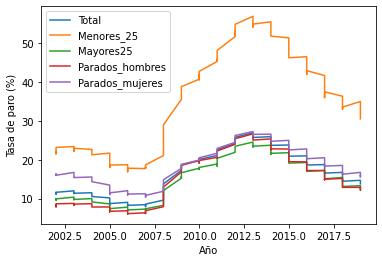

In [44]:
plt.plot(Año,Total, label='Total');
plt.plot(Año,Menores_25,label='Menores_25');
plt.plot(Año,Mayores_25, label='Mayores25');
plt.plot(Año,Parados_hombres,label='Parados_hombres');
plt.plot(Año,Parados_mujeres,label='Parados_mujeres');
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');
plt.legend();


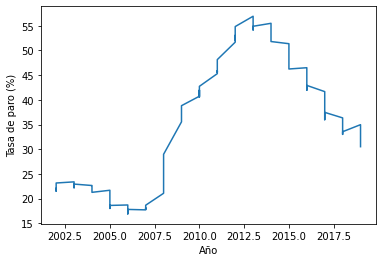

In [45]:
plt.plot(Año,Menores_25);
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');

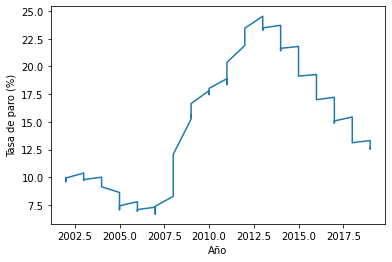

In [46]:
plt.plot(Año,Mayores_25);
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');

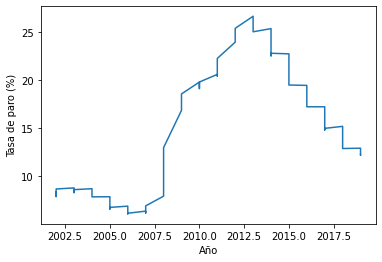

In [47]:
plt.plot(Año,Parados_hombres);
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');

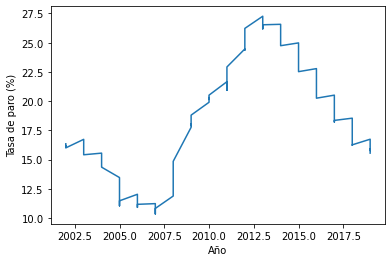

In [48]:
plt.plot(Año,Parados_mujeres);
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');

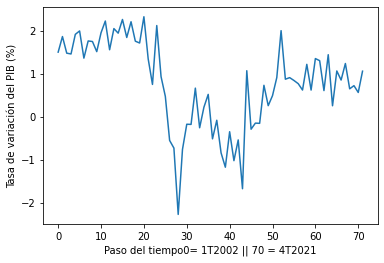

In [49]:
plt.plot(Var_PIB) 
plt.ylabel('Tasa de variación del PIB (%)')
plt.xlabel('Paso del tiempo'
            '0= 1T2002 || 70 = 4T2021');

>Como podemos ver en los gráficos, tanto el paro total como todos los grupos de sexo y edad tienen la misma forma, por lo que se presupone que van a estar correlacionados del mismo modo, de todas formas vamos a ver los coeficientes de correlación de cada grupo para ver qué grupos se ven mas afectados por las variaciónes del PIB:

In [50]:
Grupos=[Menores_25,Mayores_25,Parados_hombres,Parados_mujeres]
Nombres=['Menores_25','Mayores_25','Parados_hombres','Parados_mujeres']
Correlaciones=[]
for i in Grupos:
    Correlaciones.append(np.corrcoef(Var_PIB,i)[0][1])
for i in range(4):
    print(f'Para el grupo {Nombres[i]} el coeficiente de correlación entre la variación del PIB y la tasa de paro es de {Correlaciones[i]}')



Para el grupo Menores_25 el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6146928506907401
Para el grupo Mayores_25 el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6100576494291562
Para el grupo Parados_hombres el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6628908432550792
Para el grupo Parados_mujeres el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.5298195747813025


> Aquí se puede ver que los grupos que mas afectados se ven por las variaciónes del PIB son los hombres ya que el coeficiente de correlación está mas cercano a -1

Text(0.5, 1.0, 'Correlación entre grupos y variación del PIB')

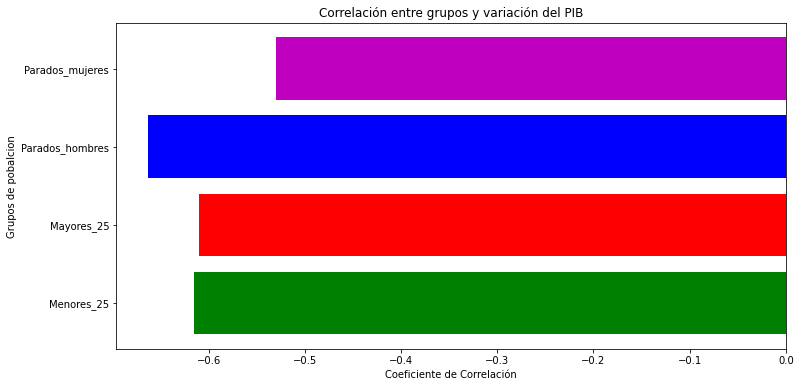

In [51]:
X=Nombres
Y=Correlaciones
plt.figure(figsize=(12,6))
plt.barh(X,Y, color=('g','r','b','m'))
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Grupos de pobalcion')
plt.title('Correlación entre grupos y variación del PIB')

## 3.2 Analisis por Comunidades Autónomas.

Vamos a ver el impacto que tiene la variación del PIB sobre las distintas comunidades autónomas, para ello vamos a escoger las siguientes CCAA que representen un modelo economico diferenciado, 3 CCAA en las que tenga un gran impacto el turismo (que estén en la costa) y dos CCAA del centro de la peninsula, con una economía menos centrada en el turismo.

* Norte Turístico: Asturias
* Sur turistico: Andalucía
* Este Turístico: Comunidad Valenciana
* Centro-Norte: Castilla y Leon
* Centro-Sur: Castilla-La Mancha

> En primer lugar, vamos a sacar 5 pequeños dataframes del dataset original:

In [52]:
PIB_Asturias = Paro_PIB_ajustado['Comunidad']=='Asturias'
Asturias=Paro_PIB_ajustado[PIB_Asturias]

PIB_Andalucía = Paro_PIB_ajustado['Comunidad']=='Andalucía'
Andalucía=Paro_PIB_ajustado[PIB_Andalucía]

PIB_Valencia = Paro_PIB_ajustado['Comunidad']=='Valencia'
Valencia=Paro_PIB_ajustado[PIB_Valencia]

PIB_cyl = Paro_PIB_ajustado['Comunidad']=='Castilla_y_León'
CyL=Paro_PIB_ajustado[PIB_cyl]

PIB_clm = Paro_PIB_ajustado['Comunidad']=='Castilla_La_Mancha'
ClM=Paro_PIB_ajustado[PIB_clm]

In [53]:
Asturias

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1583,2002T1,Asturias,9.15,21.51,7.84,6.60,13.16,1.5069,2002,1
1563,2002T2,Asturias,10.28,23.02,8.88,7.43,14.69,1.8697,2002,2
1543,2002T3,Asturias,9.67,24.27,8.01,7.49,13.07,1.4831,2002,3
1523,2002T4,Asturias,10.12,23.38,8.60,7.25,14.45,1.4646,2002,4
1503,2003T1,Asturias,12.44,30.15,10.42,8.95,17.57,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...
243,2018T4,Asturias,12.86,27.47,12.28,11.55,14.23,1.2426,2018,4
223,2019T1,Asturias,15.03,29.59,14.37,13.97,16.15,0.6539,2019,1
203,2019T2,Asturias,14.17,26.23,13.65,12.35,16.07,0.7273,2019,2
183,2019T3,Asturias,14.43,28.40,13.80,14.17,14.71,0.5691,2019,3


In [54]:
Andalucía

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1581,2002T1,Andalucía,18.95,30.13,16.92,14.29,26.47,1.5069,2002,1
1561,2002T2,Andalucía,18.62,29.41,16.63,13.04,27.51,1.8697,2002,2
1541,2002T3,Andalucía,20.26,32.38,17.98,14.94,28.94,1.4831,2002,3
1521,2002T4,Andalucía,20.15,33.33,17.74,14.87,28.65,1.4646,2002,4
1501,2003T1,Andalucía,19.00,30.97,16.94,14.28,26.49,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...
241,2018T4,Andalucía,21.26,45.09,19.43,17.92,25.39,1.2426,2018,4
221,2019T1,Andalucía,21.08,40.93,19.62,17.49,25.37,0.6539,2019,1
201,2019T2,Andalucía,21.04,40.94,19.53,17.67,25.08,0.7273,2019,2
181,2019T3,Andalucía,21.83,43.70,20.03,18.35,26.04,0.5691,2019,3


In [55]:
Valencia

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1590,2002T1,Valencia,10.07,19.40,8.47,6.97,14.65,1.5069,2002,1
1570,2002T2,Valencia,11.19,21.26,9.54,8.40,15.27,1.8697,2002,2
1550,2002T3,Valencia,11.29,19.92,9.83,8.61,15.31,1.4831,2002,3
1530,2002T4,Valencia,10.71,22.09,8.87,8.64,13.74,1.4646,2002,4
1510,2003T1,Valencia,11.60,21.58,9.97,8.53,16.15,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...
250,2018T4,Valencia,14.30,33.16,13.04,12.56,16.35,1.2426,2018,4
230,2019T1,Valencia,14.11,32.34,12.91,11.80,16.85,0.6539,2019,1
210,2019T2,Valencia,14.30,36.90,12.66,12.08,16.92,0.7273,2019,2
190,2019T3,Valencia,13.91,29.28,12.65,11.44,16.84,0.5691,2019,3


In [56]:
CyL

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1587,2002T1,Castilla_y_León,10.83,26.39,8.93,7.06,17.07,1.5069,2002,1
1567,2002T2,Castilla_y_León,10.65,24.67,8.95,6.52,17.33,1.8697,2002,2
1547,2002T3,Castilla_y_León,10.23,23.19,8.57,6.64,15.96,1.4831,2002,3
1527,2002T4,Castilla_y_León,10.15,24.97,8.37,6.45,16.05,1.4646,2002,4
1507,2003T1,Castilla_y_León,11.39,26.73,9.57,7.20,18.02,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...
247,2018T4,Castilla_y_León,11.21,25.47,10.43,9.78,12.93,1.2426,2018,4
227,2019T1,Castilla_y_León,12.42,32.22,11.37,10.73,14.46,0.6539,2019,1
207,2019T2,Castilla_y_León,11.76,33.60,10.49,9.99,13.90,0.7273,2019,2
187,2019T3,Castilla_y_León,11.18,25.82,10.19,9.66,13.00,0.5691,2019,3


In [57]:
ClM

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1588,2002T1,Castilla_La_Mancha,9.72,19.16,8.12,5.66,17.09,1.5069,2002,1
1568,2002T2,Castilla_La_Mancha,9.35,17.59,7.96,6.26,14.97,1.8697,2002,2
1548,2002T3,Castilla_La_Mancha,9.17,16.53,7.86,5.75,15.16,1.4831,2002,3
1528,2002T4,Castilla_La_Mancha,9.85,17.11,8.64,5.88,16.87,1.4646,2002,4
1508,2003T1,Castilla_La_Mancha,10.93,18.90,9.63,7.03,17.69,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...
248,2018T4,Castilla_La_Mancha,16.16,41.74,14.23,11.89,21.56,1.2426,2018,4
228,2019T1,Castilla_La_Mancha,15.74,38.78,14.05,11.60,21.01,0.6539,2019,1
208,2019T2,Castilla_La_Mancha,16.42,42.05,14.47,12.77,21.10,0.7273,2019,2
188,2019T3,Castilla_La_Mancha,16.10,39.04,14.20,12.25,21.03,0.5691,2019,3


In [58]:
# Aquí no nos vamos a centrar en los grupos de población, sino simplemente en el total:

In [59]:
Total_Asturias=np.array(Asturias['Total'].values)
Total_Andalucía=np.array(Andalucía['Total'].values)
Total_Valencia=np.array(Valencia['Total'].values)
Total_CyL=np.array(CyL['Total'].values)
Total_ClM=np.array(ClM['Total'].values)

> Como podemos ver en este gráfico, todas las comunidades presentan la misma tendencia y forma solo que Andalucía está muy por encima del resto, siendo mas parejas Valencia y ClM y despues las que menos tasa de paro presentan serían Asturias y CyL.

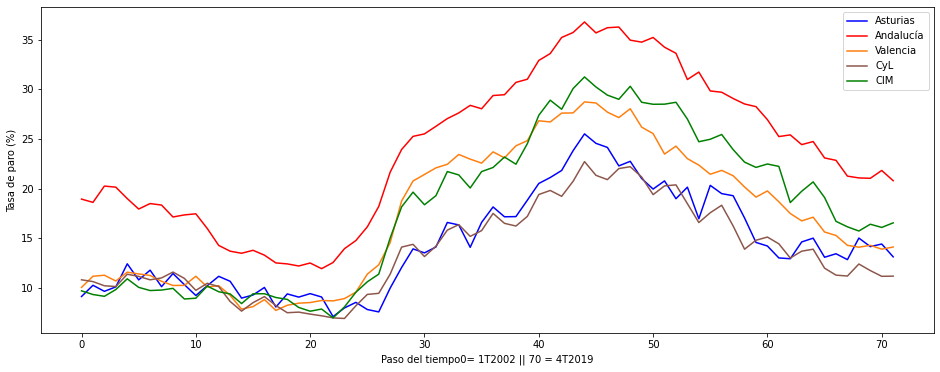

In [60]:
plt.figure(figsize=(16,6))
plt.plot(Total_Asturias,label='Asturias',color=('b'))
plt.plot(Total_Andalucía,label='Andalucía',color=('r'))
plt.plot(Total_Valencia,label='Valencia',color=('tab:orange'))
plt.plot(Total_CyL,label='CyL',color=('tab:brown'))
plt.plot(Total_ClM,label='ClM',color=('g'))
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Paso del tiempo'
            '0= 1T2002 || 70 = 4T2019');
plt.legend();

In [61]:
Comunidades=[Total_Asturias,Total_Andalucía,Total_Valencia,Total_CyL,Total_ClM]
Nombres_com=['Asturias','Andalucía','Valencia','CyL','ClM']
Medias_comunidades=[]
for i in Comunidades:
    Medias_comunidades.append(np.mean(i))
for i in range(5):
    print(f'Para la comunidad autónoma: {Nombres_com[i]} la media de la tasa de paro es {Medias_comunidades[i]}')

Para la comunidad autónoma: Asturias la media de la tasa de paro es 14.44597222222222
Para la comunidad autónoma: Andalucía la media de la tasa de paro es 23.91347222222222
Para la comunidad autónoma: Valencia la media de la tasa de paro es 17.243055555555557
Para la comunidad autónoma: CyL la media de la tasa de paro es 13.708472222222222
Para la comunidad autónoma: ClM la media de la tasa de paro es 17.90652777777778


> Este gráfico nos da unas conclusiones muy parecidas al anterior, la tasa media mas grande es sin duda la Andaluza, seguida de la Valenciana y la Manchega que son muy parejas y por último las de Asturias y CyL las medias mas bajas.

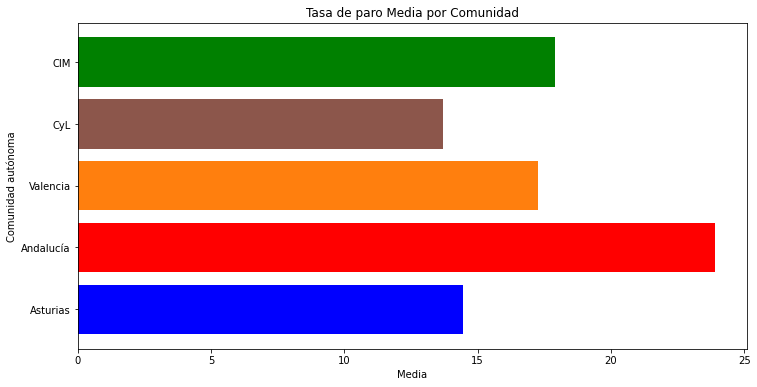

In [62]:
X=Nombres_com
Y=Medias_comunidades
plt.figure(figsize=(12,6))
plt.barh(X,Y, color=('b','r','tab:orange','tab:brown','g'))
plt.xlabel('Media')
plt.ylabel('Comunidad autónoma')
plt.title('Tasa de paro Media por Comunidad');

In [63]:
Comunidades=[Total_Asturias,Total_Andalucía,Total_Valencia,Total_CyL,Total_ClM]
Nombres_com=['Asturias','Andalucía','Valencia','CyL','ClM']
Correlaciones_comunidades=[]
for i in Comunidades:
    Correlaciones_comunidades.append(np.corrcoef(Var_PIB,i)[0][1])
for i in range(5):
    print(f'Para la comunidad: {Nombres_com[i]} el coeficiente de correlación entre la variación del PIB y la tasa de paro es de {Correlaciones_comunidades[i]}')

Para la comunidad: Asturias el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.5102693326819734
Para la comunidad: Andalucía el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.606203012984111
Para la comunidad: Valencia el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6713006731332903
Para la comunidad: CyL el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.5518628278183264
Para la comunidad: ClM el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.5846840364817802


> Este gráfico en cambio lo que nos muestra es que la comunidad que más sufre las variaciones del PIB es la Comunidad Valenciana y la que menos Asturias, siendo las otras no muy diferentes significativamente.

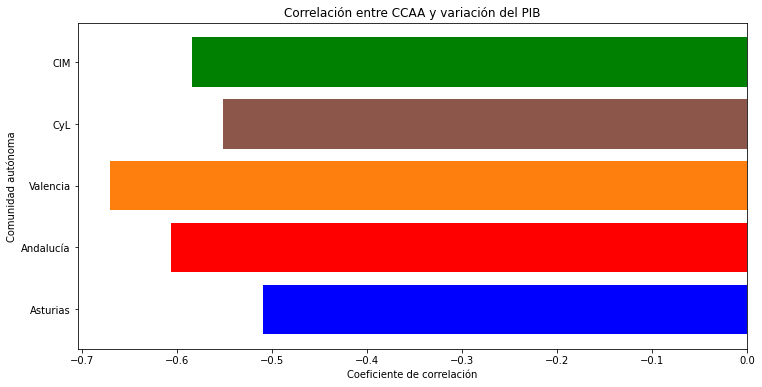

In [64]:
X=Nombres_com
Y=Correlaciones_comunidades
plt.figure(figsize=(12,6))
plt.barh(X,Y, color=('b','r','tab:orange','tab:brown','g'))
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Comunidad autónoma')
plt.title('Correlación entre CCAA y variación del PIB');

## 4. Conclusiones

### 1. Datos atípicos
Como podemos observar en el primer gráfico, los datos durante la epoca del covid son totalmente atípicos alcanzando variaciónes del PIB superiores al 15%, por lo tanto las hemos eliminado de nuestro dataset ya que iban a distorsionar bastante la realidad.

### 2. Tasas de paro media

### 2.1 Por Grupo
Como podemos observar en las diferentes medias, los mas afectados en general por el paro son los menores de 25 ya que estos alcanzan una tasa media superior al 35%, siendo la media total de la tasa de paro de un 16%. El resto de grupos son bastante parejos, ya que el conjunto de mayores de 25 y el conjunto de hombres rondan el 14% ambos, siendo el conjunto poblacional femenino el segundo mas afectado con una tasa de paro media del 18%, mas o menos la mitad que el primero.

In [65]:
Total_Nacional.describe(include='float64')

,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,16.315972,35.137639,14.581944,14.875972,18.218889,0.785196
std,5.883646,12.956964,5.546306,6.597582,4.946153,1.021941
min,7.930000,16.900000,6.680000,6.050000,10.350000,-2.267600
25%,11.210000,22.162500,9.622500,8.330000,14.985000,0.150125
50%,16.465000,35.755000,14.985000,14.885000,17.835000,0.867850
75%,21.020000,46.300000,19.025000,20.030000,21.995000,1.529675
max,26.940000,56.920000,24.540000,26.660000,27.260000,2.330400


### 2.2 Por Comunidad
En el gráfico se puede apreciar que las CCAAs se dividen en 3 grupos, la CCAA con mas paro sin duda es Andalucía, despues Valencia y ClM les siguen siendo sus medias muy parejas, y para terminar, Asturias y CyL las que tienen una tasa de paro media mas baja.

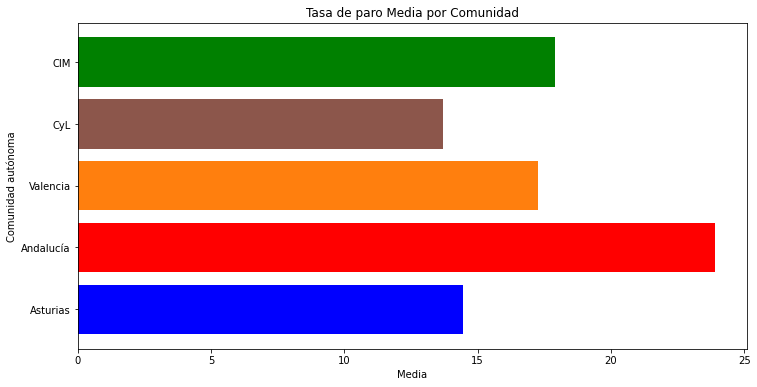

In [66]:
X=Nombres_com
Y=Medias_comunidades
plt.figure(figsize=(12,6))
plt.barh(X,Y, color=('b','r','tab:orange','tab:brown','g'))
plt.xlabel('Media')
plt.ylabel('Comunidad autónoma')
plt.title('Tasa de paro Media por Comunidad');

### 3. Relación entre la tasa de variación del PIB y la tasa de Paro

#### 3.1 Conjunto total de la población
Tanto la covarianza como el coeficiente de correlación entre la tasa de variación del PIB y la tasa de paro son negativas, lo que significa que están correlacionadas de manera inversa, es decir, cuando una sube, la otra baja, cuanto mas cerca de -1 mas grande es esta correlación, es decir, mas afectan las bajadas y las subidas, y cuanto mas cercano a 0 menos afecta. 

Lo podemos observar en los gráficos aportados, donde en la tasa de paro podemos ver una tendecia cóncava mientras que la de la tasa de variación del PIB es convexa.

In [67]:
print(f'La covarianza del cojunto total de la poblacion sería de {cov_paro_pib} y' 
      f' el coeficiente de correlación sería del {corr_paro_pib}')

La covarianza del cojunto total de la poblacion sería de -3.734613045187793 y el coeficiente de correlación sería del -0.6211170763069683


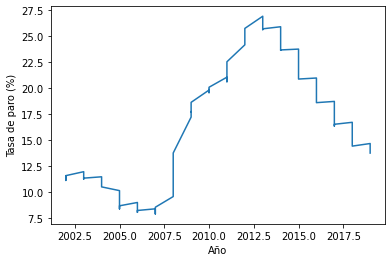

In [68]:
plt.plot(Año,Total);
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');

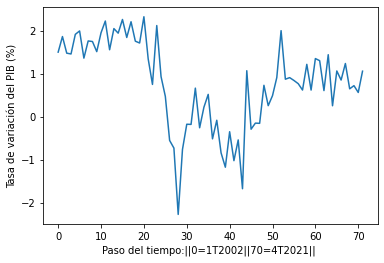

In [69]:
plt.plot(Var_PIB);
plt.ylabel('Tasa de variación del PIB (%)')
plt.xlabel('Paso del tiempo:'
            '||0=1T2002||70=4T2021|| ');
        

#### 3.2 Conjunto poblacional por edades
Si comparamos el coeficiente de correlación de los menores de 25 con el de los mayores de 25 podemos apreciar que es un poco mayor el de los menores de 25, lo que quiere decir que ante una bajada de la tasa de variación del PIB, la tasa de paro de los menores de 25 aumentará mas que la de los mayores de 25.
En los gráficos también se puede apreciar esa forma cóncava, contraria a la gráfica de variación del PIB, siendo mas acentuada la concavidad de los menores de 25, indicando una mayor sensibilidad ante las variaciones del PIB, tal y como se veía con el coeficiente de correlación.

In [70]:
for i in Grupos:
    Correlaciones.append(np.corrcoef(Var_PIB,i)[0][1])
for i in range(2):
    print(f'Para el grupo {Nombres[i]} el coeficiente de correlación entre la variación del PIB y' 
          f' la tasa de paro es de {Correlaciones[i]}')

Para el grupo Menores_25 el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6146928506907401
Para el grupo Mayores_25 el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6100576494291562


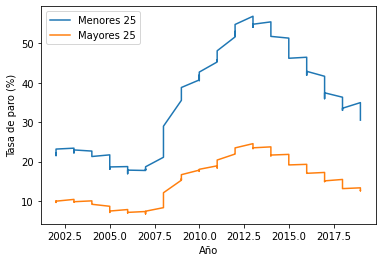

In [71]:
plt.plot(Año,Menores_25,label='Menores 25');
plt.plot(Año,Mayores_25,label='Mayores 25');
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');
plt.legend();

#### 3.3 Conjunto poblacional por sexos
Si comparamos el coeficiente de correlación de los hombres parados con el de las mujeres paradas podemos apreciar que es significativamente mayor el de los hombres parados, lo que quiere decir que ante una bajada de la tasa de variación del PIB, la tasa de paro de los hombres aumentará mas que la de las mujeres.
En los gráficos también se puede apreciar esa forma cóncava, contraria a la gráfica de variación del PIB, siendo mas acentuada la concavidad de los hombres parados, indicando una mayor sensibilidad ante las variaciones del PIB, tal y como se veía con el coeficiente de correlación.

In [72]:
for i in Grupos:
    Correlaciones.append(np.corrcoef(Var_PIB,i)[0][1])
for i in range(2,4):
    print(f'Para el grupo {Nombres[i]} el coeficiente de correlación entre la variación del PIB' 
          f' y la tasa de paro es de {Correlaciones[i]}')

Para el grupo Parados_hombres el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6628908432550792
Para el grupo Parados_mujeres el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.5298195747813025


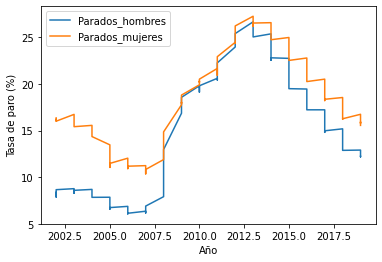

In [73]:
plt.plot(Año,Parados_hombres,label='Parados_hombres');
plt.plot(Año,Parados_mujeres,label='Parados_mujeres')
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');
plt.legend();


### 3.4 Comunidades Autónomas:

Como podemos ver en los gráficos, a pesar de que Andalucía, como bien se ha comentado en el apartado de las medias, tiene una tasa de paro mas alta, la CCAA que mas sufre las variaciónes del PIB es la Comunidad Valenciana, y la que menos Asturas, el resto de comunidades se encuentran bastante cercanas en cuanto a sensibilidad bajo variaciónes del PIB siendo CyL la menor.

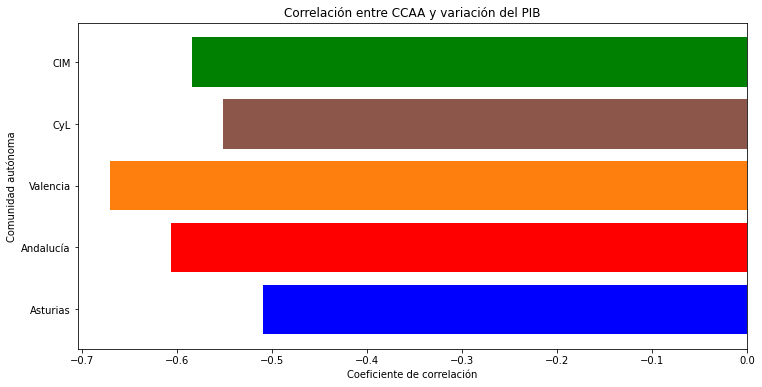

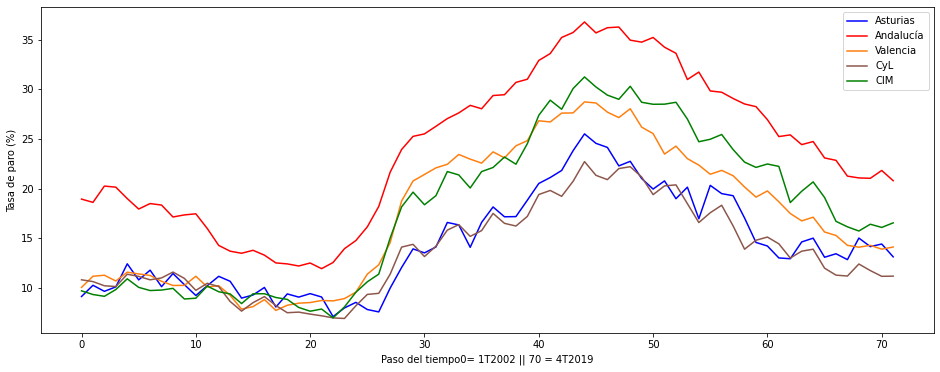

In [74]:
X=Nombres_com
Y=Correlaciones_comunidades
plt.figure(figsize=(12,6))
plt.barh(X,Y, color=('b','r','tab:orange','tab:brown','g'))
plt.xlabel('Coeficiente de correlación')
plt.ylabel('Comunidad autónoma')
plt.title('Correlación entre CCAA y variación del PIB');

plt.figure(figsize=(16,6))
plt.plot(Total_Asturias,label='Asturias',color=('b'))
plt.plot(Total_Andalucía,label='Andalucía',color=('r'))
plt.plot(Total_Valencia,label='Valencia',color=('tab:orange'))
plt.plot(Total_CyL,label='CyL',color=('tab:brown'))
plt.plot(Total_ClM,label='ClM',color=('g'))
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Paso del tiempo'
            '0= 1T2002 || 70 = 4T2019');
plt.legend();

## 4. Conclusiónes generales:

#### 4.1 Grupo mas afectado por el paro:
Los mas afectados por el paro son los menores de 25, independientemente de si el PIB aumenta o disminuye ya que de media hay muchos mas parados menores de 25 que cualquier otro conjunto poblacional (35%), llegando a ser este casi el doble del segundo grupo con mas tasa media de paro, las mujeres (18%).
#### 4.2 Grupo menos afectado por el paro:
El grupo menos afectado por el paro es sin duda el conjunto poblacional formado por personas mayores de 25 años, ya que a pesar de tener de media un 1% mas de paro que el conjunto de los hombres, el coeficiente de correlación de los hombres es mucho mas cercano a -1, es decir, que ante una bajada del PIB, el paro del conjunto de los hombres aumentará mas que el conjunto de los mayores de 25 años.
#### 4.2 Grupo mas sensible a las variaciones del PIB:
Sin duda alguna, el grupo al que mas afectan las variaciones del PIB es el conjunto de los hombres, ya que aunque es el grupo que menos paro presenta de todos también es el que tiene una correlación mas cercana a -1 de todos, es decir, que ante una bajada del PIB son el grupo donde mas trabajo se va a destruir, y en cambio ante una epoca de prosperidad donde el PIB aumenta, es el conjunto de la población donde mas trabajo se va a generar.
#### 4.3 Grupo con mayor estabilidad laboral:
Sin duda alguna, en este ámbito el caballo ganador son las mujeres, a pesar de tener una tasa de paro media ligeramente superior a la media total, masculina y de mayores de 25, su coeficiente de correlación es de tan solo un -0.3, es decir, el mas alejado de -1 de todos, por lo que ante una bajada del PIB (recesión) las mujeres que estén empleadas tendrán mas posibilidades de mantener sus empleos ya que la tasa de paro de las mujeres no aumenta tanto ante las caídas del PIB. Por el contrario, ante una situación de expansión o aumento del PIB no se generará tanto empleo como en los otros grupos.

In [75]:
Grupos=[Menores_25,Mayores_25,Parados_hombres,Parados_mujeres]
Nombres=['Menores_25','Mayores_25','Parados_hombres','Parados_mujeres']
Correlaciones=[]
for i in Grupos:
    Correlaciones.append(np.corrcoef(Var_PIB,i)[0][1])
for i in range(4):
    print(f'Para el grupo {Nombres[i]} el coeficiente de correlación entre la variación del PIB y '
    f'la tasa de paro es de {Correlaciones[i]}')


Para el grupo Menores_25 el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6146928506907401
Para el grupo Mayores_25 el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6100576494291562
Para el grupo Parados_hombres el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.6628908432550792
Para el grupo Parados_mujeres el coeficiente de correlación entre la variación del PIB y la tasa de paro es de -0.5298195747813025


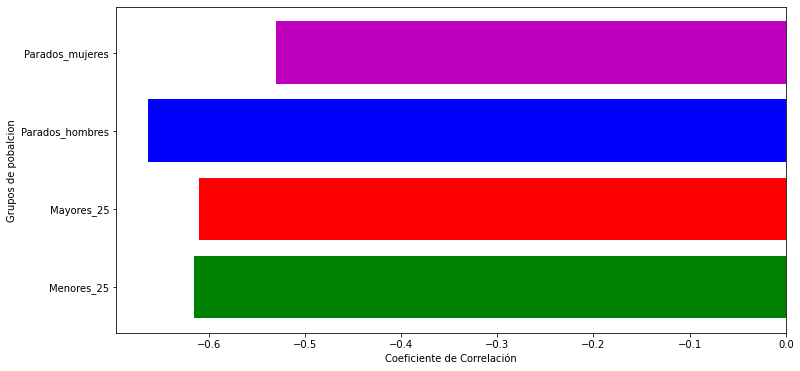

In [76]:
X=Nombres
Y=Correlaciones
plt.figure(figsize=(12,6))
plt.barh(X,Y, color=('g','r','b','m'))
plt.xlabel('Coeficiente de Correlación')
plt.ylabel('Grupos de pobalcion');

### 4.4 Impacto geográfico
En un principio lo que quería ver era si las comunidades autónomas costeras, mas dependientes del turismo, se veian mas afectadas en los momentos de crisis que las comunidades cel centro de la peninsula, pero como bien se ha visto en los datos y gráficos esto no es así, lo que realmente diferencia las tasas de paro y el impacto de la tasa de variación del PIB es la localización. Se ve claramente que hay 3 grupos: sur,centro y norte, La CCAA del Sur que es la mas afectada por el paro y la segunda mas sensible a las variaciónes del PIB es Andalucía,seguida de las regiones mas centrales como ClM y Valencia que son muy parejas en Tasa de paro y Tasa de paro media, pero no tanto en cuanto a sensibilidad porque si que es cierto que Valencia sufre algo mas las variacónes del PIB, probablemente debido a una mayor dependecia del turismo. Por último las CCAA menos afectadas en general son las del norte, ya sea por tasa de paro, tasa de paro media o sensibilidad ante las variaciones del PIB Asturias y CyL parecen sufrir menos en terminos generales los estragos del paro, por lo que en conclusión, podemo sacar que la verdadera brecha se produce entre el norte de España, mas próspero y el sur de España que sufre mas estas caidas del PIB.

### 5. Bonus

### 5.1 Tasa de variación total

Parece que a lo largo de estos 20 años, las únicas que han conseguido disminuir su tasa de paro (es decir, tiene una tasa de variación total negativa) son las mujeres.

In [77]:
# Tasa de variación total de cada uno de los grupos y CCAA:
Grupos_totales=[Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Total_Asturias,Total_Andalucía,Total_Valencia,Total_CyL,Total_ClM]
Nombres_totales=['Menores_25','Mayores_25','Parados_hombres','Parados_mujeres','Asturias','Andalucía','Valencia','CyL','ClM']
Tasa_var_total=[]
for i in Grupos_totales:
    Tasa_var_total.append(((i[-1]-i[0])/i[0])*100)
for i in range(8):
    print(f'Para el conjunto de {Nombres_totales[i]} la tasa de variación total del PIB es de {Tasa_var_total[i]}%')
    

Para el conjunto de Menores_25 la tasa de variación total del PIB es de 38.179347826086975%
Para el conjunto de Mayores_25 la tasa de variación total del PIB es de 26.606425702811226%
Para el conjunto de Parados_hombres la tasa de variación total del PIB es de 46.29186602870815%
Para el conjunto de Parados_mujeres la tasa de variación total del PIB es de -4.892966360856273%
Para el conjunto de Asturias la tasa de variación total del PIB es de 43.606557377049185%
Para el conjunto de Andalucía la tasa de variación total del PIB es de 9.76253298153035%
Para el conjunto de Valencia la tasa de variación total del PIB es de 40.31777557100298%
Para el conjunto de CyL la tasa de variación total del PIB es de 3.4164358264081187%


<BarContainer object of 9 artists>

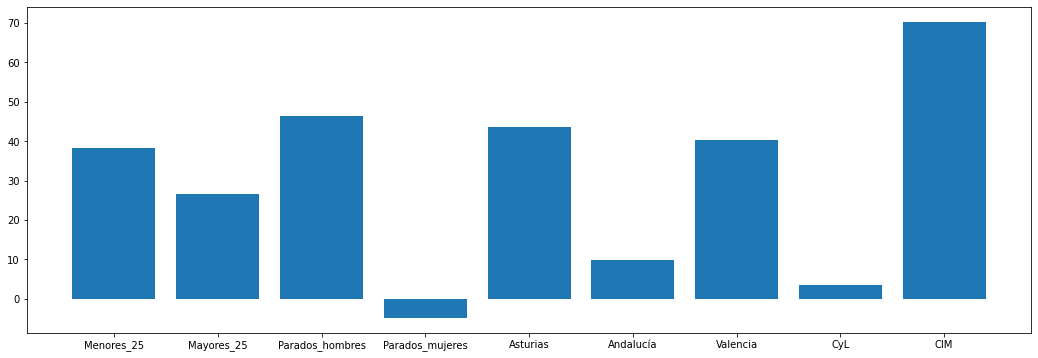

In [78]:
plt.figure(figsize=(18,6))
plt.bar(Nombres_totales,Tasa_var_total)

### 5.2 Medias móviles

Vamos a calcular las medias móviles del total de la población:
Primero convertimos el array numérica en un objeto de serie de tiempo y luego usamos la función rolling() para realizar el cálculo en la ventana rodante y calculamos la media móvil usando la función mean().

Aquí también, dado que el intervalo de la ventana de tiempo es 4, hay 5 valores nan al principio porque no se pudo calcular la media móvil para ellos.

In [79]:
Total

array([11.55, 11.15, 11.49, 11.61, 11.99, 11.28, 11.3 , 11.37, 11.5 ,
       11.09, 10.74, 10.53, 10.17,  9.32,  8.41,  8.71,  9.03,  8.44,
        8.08,  8.26,  8.42,  7.93,  8.01,  8.57,  9.6 , 10.36, 11.23,
       13.79, 17.24, 17.77, 17.75, 18.66, 19.84, 19.89, 19.59, 20.11,
       21.08, 20.64, 21.28, 22.56, 24.19, 24.4 , 24.79, 25.77, 26.94,
       26.06, 25.65, 25.73, 25.93, 24.47, 23.67, 23.7 , 23.78, 22.37,
       21.18, 20.9 , 21.  , 20.  , 18.91, 18.63, 18.75, 17.22, 16.38,
       16.55, 16.74, 15.28, 14.55, 14.45, 14.7 , 14.02, 13.92, 13.78])

In [80]:
Total_df=pd.Series(Total)

In [81]:
Total_df

0     11.55
1     11.15
2     11.49
3     11.61
4     11.99
      ...  
67    14.45
68    14.70
69    14.02
70    13.92
71    13.78
Length: 72, dtype: float64

In [82]:
Medias_moviles=Total_df.rolling(6).mean()
Total_df
Medias_moviles.head(10)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5    11.511667
6    11.470000
7    11.506667
8    11.508333
9    11.421667
dtype: float64

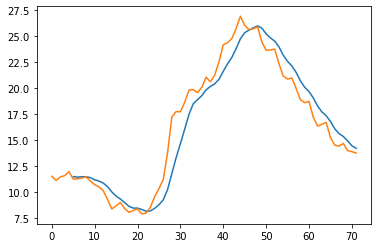

In [83]:
plt.plot(Medias_moviles)
plt.plot(Total)

### 5.3 Se distribuyen los datos como una normal?

Realizaremos un contraste de hipotesis para saber si los datos se distribuyen como una normal:

$$ H_0 = Los\ datos\ proceden\ de\ una\ distribución\ normal\\
H_1 = Los\ datos\ no\ proceden\ de\ una\ distribución\ normal

In [84]:
p_value=ss.normaltest(Total)
p_value

NormaltestResult(statistic=31.694668563741242, pvalue=1.3109621969503847e-07)

> Como el p-valor es inferior a 0.05, rechazamos la hipotesis nula de que se distribuye como una normal, es decir, los datos no se distribuyen como una distribución normal.

## Test no paramétrico

Aunque en el test anterior hemos descartado la hipótesis de que los datos proceden de una distribución normal, vamos a suponer que si se distribuyen como una normal y realizar un test no paramétrico para descubrir si la población de Madrid, al ser la capital, tiene mas probabilidades de tener una menor tasa de paro que el de la poblablación total. O lo que es lo mismo, que la tasa de paro Nacional es mayor que la de Madrid.

El U-Test contrasta que la probabilidad de que una observación de la población X supere a una observación de la población Y es igual a la probabilidad de que una observación de la población Y supere a una de la población X. Es decir, que los valores de una población no tienden a ser mayores que los de otra.

$$ H_0 : P(X>Y)=0.5\ es\ decir,\ las\ tasas\ de\ paro\ no\ tienden\ a\ ser\ mayores\ en\ ninguna\ de\ las\ dos\ poblaciones\\ 
H_1 : P(X>Y) \neq 0.5\ es\ decir,\ las\ tasas\ de\ paro\ si\ tienden\ a\ ser\ mayores\ en\ una\ de\ las\ dos\ poblaciones\\

In [85]:
# Para empezar vamos a aislar los datos con la tasa de paro de madrid:
PIB_Madrid = Paro_PIB_ajustado['Comunidad']=='Madrid'
Madrid=Paro_PIB_ajustado[PIB_Madrid]
Madrid

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1593,2002T1,Madrid,7.49,14.49,6.60,5.19,10.63,1.5069,2002,1
1573,2002T2,Madrid,6.96,14.33,6.02,4.64,10.10,1.8697,2002,2
1553,2002T3,Madrid,7.75,15.54,6.74,5.61,10.60,1.4831,2002,3
1533,2002T4,Madrid,6.99,15.44,5.96,4.60,10.19,1.4646,2002,4
1513,2003T1,Madrid,7.77,14.18,7.00,5.22,11.13,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...
253,2018T4,Madrid,11.54,30.42,10.28,11.07,12.05,1.2426,2018,4
233,2019T1,Madrid,11.70,33.16,10.37,10.64,12.82,0.6539,2019,1
213,2019T2,Madrid,10.54,29.24,9.35,9.80,11.32,0.7273,2019,2
193,2019T3,Madrid,10.26,29.69,8.97,9.41,11.17,0.5691,2019,3


In [86]:
Total_Nacional

,Periodo,Comunidad,Total,Menores_25,Mayores_25,Parados_hombres,Parados_mujeres,Var_PIB,Año,Trimestre
1580,2002T1,Total_Nacional,11.55,22.08,9.96,8.36,16.35,1.5069,2002,1
1560,2002T2,Total_Nacional,11.15,21.50,9.60,7.86,16.04,1.8697,2002,2
1540,2002T3,Total_Nacional,11.49,22.05,9.87,8.33,16.20,1.4831,2002,3
1520,2002T4,Total_Nacional,11.61,23.16,9.92,8.65,16.00,1.4646,2002,4
1500,2003T1,Total_Nacional,11.99,23.39,10.37,8.76,16.73,1.9207,2003,1
...,...,...,...,...,...,...,...,...,...,...
240,2018T4,Total_Nacional,14.45,33.54,13.11,12.87,16.26,1.2426,2018,4
220,2019T1,Total_Nacional,14.70,34.97,13.31,12.90,16.74,0.6539,2019,1
200,2019T2,Total_Nacional,14.02,33.14,12.67,12.49,15.78,0.7273,2019,2
180,2019T3,Total_Nacional,13.92,31.68,12.55,12.17,15.92,0.5691,2019,3


In [87]:
# Hacemos un dataframe con los datos de tasa de paro total de Madrid y España
# ==============================================================================
valores_A = np.array(Madrid.loc[:,"Total"])
valores_B = np.array(Total_Nacional.loc[:,"Total"])
muestra_Madrid = np.repeat(['Madrid', 'España'], repeats=72)
datos_Madrid_España = pd.DataFrame({
            'valor': np.concatenate([valores_A, valores_B]),
            'muestra': muestra_Madrid
})
datos_Madrid_España

,valor,muestra
0,7.49,Madrid
1,6.96,Madrid
2,7.75,Madrid
3,6.99,Madrid
4,7.77,Madrid
...,...,...
139,14.45,España
140,14.70,España
141,14.02,España
142,13.92,España


Para poder aplicar el U-Test, las varianzas tienen que ser iguales, para ello utilizo el test de Levene:

In [88]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [89]:
import pingouin as pg

In [90]:
# Test de homocedasticidad
# ==============================================================================
pg.homoscedasticity(data=datos_Madrid_España, dv='valor', group='muestra', method='levene')

,W,pval,equal_var
levene,4.590866,0.033848,False


El p-valor es inferior a 0.05, pero como tampoco da un numero insignificantemente pequeño vamos a seguir con el U-Test
por motivos meramente académicos

In [91]:
# U-test (p-value y tamaño de efecto)
# ==============================================================================
pg.mwu(y=valores_B, x=valores_A)

,U-val,alternative,p-val,RBC,CLES
MWU,1550.5,two-sided,0.000032,0.401813,0.299093


El p-valor es inferior a 0.05, por lo que descartamos la hipótesis nula de que las tasas de paro no tienden a ser mayores en ninguna de las dos poblaciones

In [92]:
Madrid.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,72.0,12.300694,4.805825,5.8700,7.135000,12.69500,16.330000,20.4500
Menores_25,72.0,30.568056,12.868845,12.5500,17.245000,31.05500,42.467500,54.0900
Mayores_25,72.0,10.811944,4.430239,4.6700,6.050000,11.16500,14.402500,18.2500
Parados_hombres,72.0,11.542361,5.344226,3.8500,5.567500,12.29500,16.060000,19.9700
Parados_mujeres,72.0,13.224167,4.213238,6.8200,9.217500,12.88000,16.850000,21.9300
Var_PIB,72.0,0.785196,1.021941,-2.2676,0.150125,0.86785,1.529675,2.3304
Año,72.0,2010.500000,5.224536,2002.0000,2006.000000,2010.50000,2015.000000,2019.0000
Trimestre,72.0,2.500000,1.125880,1.0000,1.750000,2.50000,3.250000,4.0000


In [93]:
Total_Nacional.describe().T

,count,mean,std,min,25%,50%,75%,max
Total,72.0,16.315972,5.883646,7.9300,11.210000,16.46500,21.020000,26.9400
Menores_25,72.0,35.137639,12.956964,16.9000,22.162500,35.75500,46.300000,56.9200
Mayores_25,72.0,14.581944,5.546306,6.6800,9.622500,14.98500,19.025000,24.5400
Parados_hombres,72.0,14.875972,6.597582,6.0500,8.330000,14.88500,20.030000,26.6600
Parados_mujeres,72.0,18.218889,4.946153,10.3500,14.985000,17.83500,21.995000,27.2600
Var_PIB,72.0,0.785196,1.021941,-2.2676,0.150125,0.86785,1.529675,2.3304
Año,72.0,2010.500000,5.224536,2002.0000,2006.000000,2010.50000,2015.000000,2019.0000
Trimestre,72.0,2.500000,1.125880,1.0000,1.750000,2.50000,3.250000,4.0000


Como podemos observar, la tasa de paro de Nacional si que es mayor que la madrileña, probablemente debido a que es la capital.

In [94]:
Total_Madrid=np.array(Madrid['Total'].values)
Total_España=np.array(Total_Nacional['Total'].values)

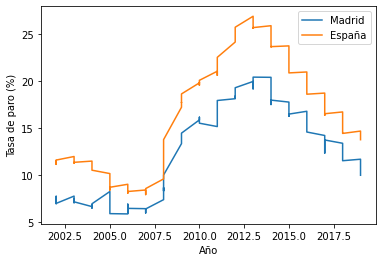

In [95]:
plt.plot(Año,Total_Madrid,label='Madrid')
plt.plot(Año,Total_España,label='España');
plt.ylabel('Tasa de paro (%)')
plt.xlabel('Año');
plt.legend();